# Histograms

### The what
A histogram is the visual representation of the distribution for a continuous feature. You can see the individual segments of the distribution and you can apply a general trend line to present the kernel density estimation plot. 

### Use case for Images
for images we can display the frequency for values of colours. Each of the three channels has va;ues between 0-255. THerefore, we can plot three histograms on top of each other to see ho much of each channel there is. 

In [41]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load image data


In [37]:
# horse image
horse = cv2.imread('DATA/horse.jpg')
rgb_horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)

# rainbow image 
rainbow = cv2.imread('DATA/rainbow.jpg')
rgb_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

# brivks image (blue brick painte wall)
bricks = cv2.imread('DATA/bricks.jpg')
rgb_bricks = cv2.cvtColor(bricks, cv2.COLOR_BGR2RGB)

In [38]:
# reminder for openCV the order is BGR 
# histsize is set to 256 as the number is exclusive (0, 255)
# ranges uses the same uint8 binds too, 0, 255
hist_vals = cv2.calcHist([bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [39]:
# conform by showing the shape
hist_vals.shape

(256, 1)

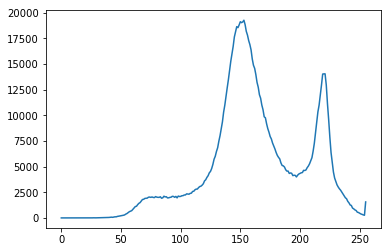

In [5]:
# vusualisise first plot
plt.plot(hist_vals)

In [6]:
# set the image to be the painted brick wall
img = bricks

Text(0.5,1,'Histogram for Blue Bricks')

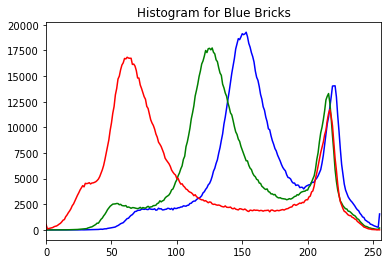

In [7]:
# reminder that our setting is to 
# accommodate for openCV color order
color = ('b', 'g', 'r')

# create the multi-plot
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title('Histogram for Blue Bricks')

Text(0.5,1,'Histogram for the Horse image')

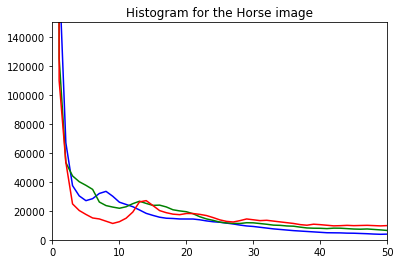

In [8]:
# repeat for the horse image
img = horse

# same openCV color ordering
color = ('b', 'g', 'r')

# depending on the image you can set the 
# x & y limits to get the plot to meaninful.
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0,50])
    plt.ylim([0, 150000])
    
plt.title('Histogram for the Horse image')

In [9]:
# note we have changed the x and y limits as the horse picture is very large
# and is predominantly black so the histogram on a wide scope is very limited
# reducing the ylim down to 150000 is required to begin to see the intesity 
# of fluctuations details.

# Historgrams - masked ROI 

In [10]:
# reset rainbow image
rainbow = cv2.imread('DATA/rainbow.jpg')
rgb_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [11]:
# rename/copy as img for working purposes 
img = rainbow

In [42]:
img.shape

(550, 413, 3)

In [43]:
# create a mask 
mask = np.zeros(img.shape[:2], np.uint8)

In [44]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

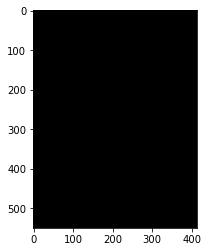

In [45]:
# shows that creating the np.zeros
# equate to a solid black mask.
plt.imshow(mask, cmap='gray')

In [46]:
# create an ROI (region of interest) by 
# slicing the data to grab our spot. 
mask[300:400, 100:400] = 255

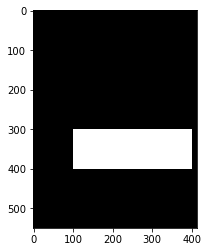

In [47]:
# plot to demonstrate the selected area
plt.imshow(mask, cmap='gray')

In [48]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [49]:
show_masked = cv2.bitwise_and(rgb_rainbow, rgb_rainbow, mask=mask)

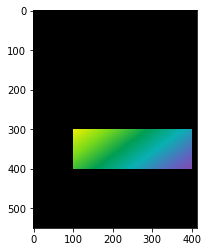

In [50]:
plt.imshow(show_masked)

In [51]:
# BGR so index of 2 for red channel
hist_masked_vals = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])

In [52]:
hist_unmasked = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5,1,'Red channel histogram for masked rainbow')

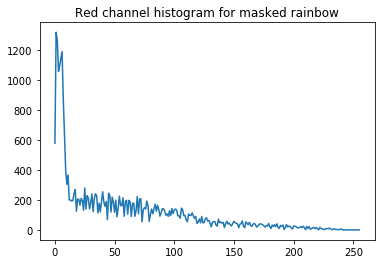

In [53]:
plt.plot(hist_masked_vals)
plt.title("Red channel histogram for masked rainbow")

Text(0.5,1,'Red channel histogram for unmasked rainbow')

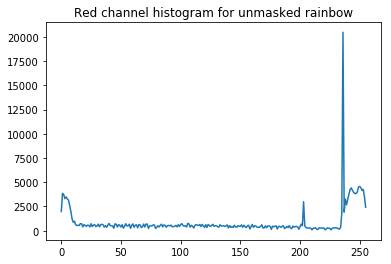

In [54]:
plt.plot(hist_unmasked)
plt.title("Red channel histogram for unmasked rainbow")

# Histogram Equalization 

Histogram equalisation is a method of contrast adjustment on the basis of the image's histogram

In [55]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

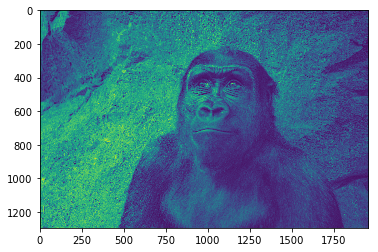

In [56]:
gorilla = cv2.imread('DATA/gorilla.jpg', 0)
plt.imshow(gorilla)

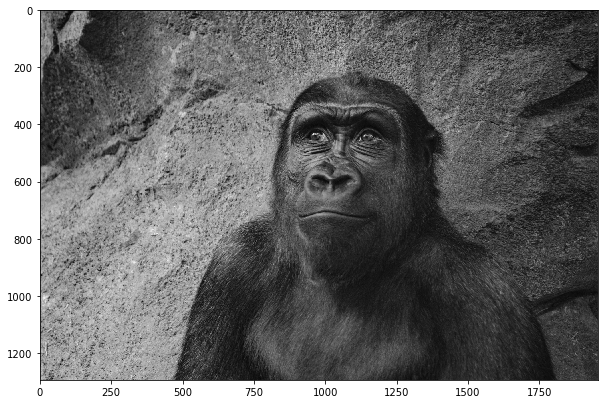

In [57]:
display(gorilla, "gray")

In [58]:
# calculate the histogram 
hist_vals = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])

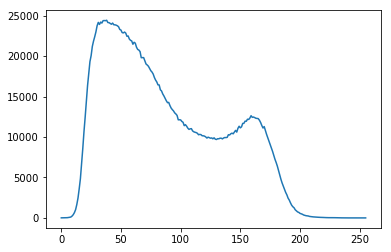

In [59]:
plt.plot(hist_vals)

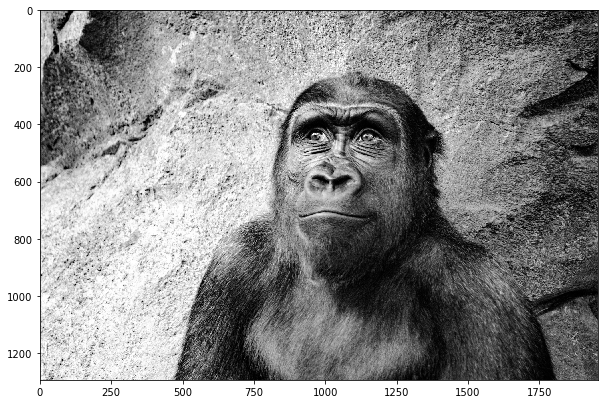

In [60]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla, 'gray')

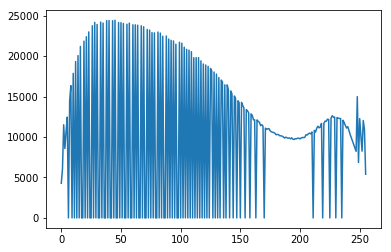

In [61]:
eq_hist_vals = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(eq_hist_vals)

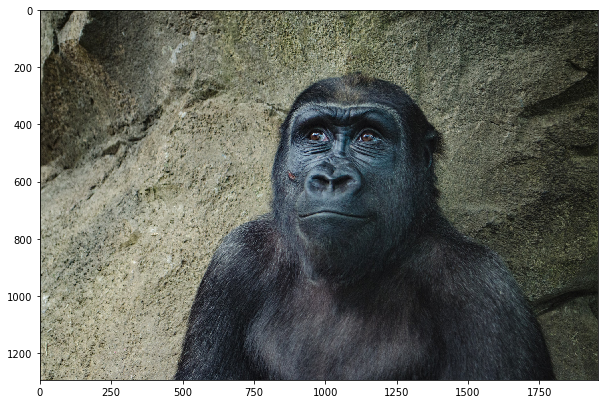

In [62]:
color_gorilla = cv2.imread('DATA/gorilla.jpg')
fixed_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
display(fixed_gorilla, None)

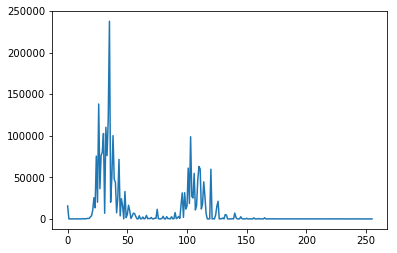

In [63]:
# Needs to be converted to HSV as we are interested in the 
# V channel. 
hsv_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)


# calculate the histogram 
color_hist_vals = cv2.calcHist([hsv_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(color_hist_vals)

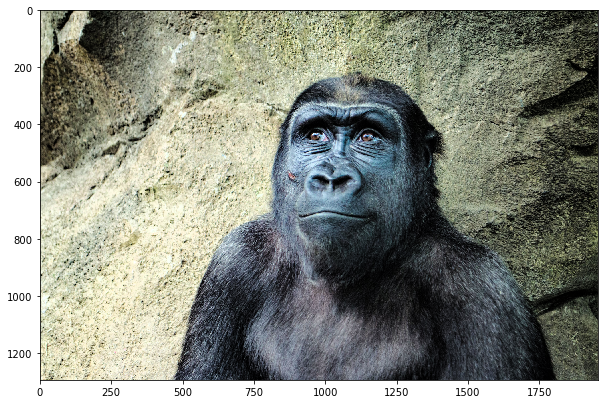

In [64]:

hsv_gorilla[:,:,2] = cv2.equalizeHist(hsv_gorilla[:,:,[2]])

eq_color_gorilla = cv2.cvtColor(hsv_gorilla, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla, None)

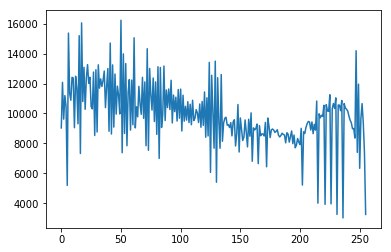

In [65]:
# calculate the histogram 
eq_color_hist_vals = cv2.calcHist([eq_color_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(eq_color_hist_vals)